BDDA Project on Credit Card Fraud

Group 4
 
Anuksha Jain - 015002 |
Ayushi Gupta - 015005 |
Aniket Nandy - 015015 |
Biswadip Das - 015025 |
Siddharth Gupta - 015045 

In [ ]:
kaggle link - https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWjh-s8sASzg7ZXHd5pQQPUo0adyqsEudkQQ9HRL5Rp9fDNOtUGfddA


In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/python/creditcard.csv")
df.head(5)# Checking 5 rows in dataset

In [ ]:

df.head(5)# Checking 5 rows in dataset

In [ ]:
print("Rows: ",df.shape[0])
print("Columns: ",df.shape[1])

In [ ]:
df.info()

In [ ]:
# Checking missing values in each column
df.isnull().sum()

In [ ]:
df[df.duplicated(keep=False)]

In [ ]:
df.duplicated()

In [ ]:
print(df.duplicated().sum())

In [ ]:
df = df.drop_duplicates(keep='first')
df

In [ ]:
# distribution of legit transactions & fraudulent transactions
class_proportion = df['Class'].value_counts()
class_proportion

In [ ]:
counts = df.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')
plt.show()

Fraud = df.loc[df['Class']==1]
Valid = df.loc[df['Class']==0]
fraction = len(Fraud)/(len(Fraud)+len(Valid))
print("Valid: ",len(Valid))
print("Fraud: ",len(Fraud))
print("fraction of fraud: ",fraction)

In [ ]:
df.describe()

In [ ]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

In [ ]:
# statistical measures of the data
legit.Amount.describe()

In [ ]:
fraud.Amount.describe()

In [ ]:
# compare the values for both transactions
df.groupby('Class').mean()

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='darkgreen')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,8,4)

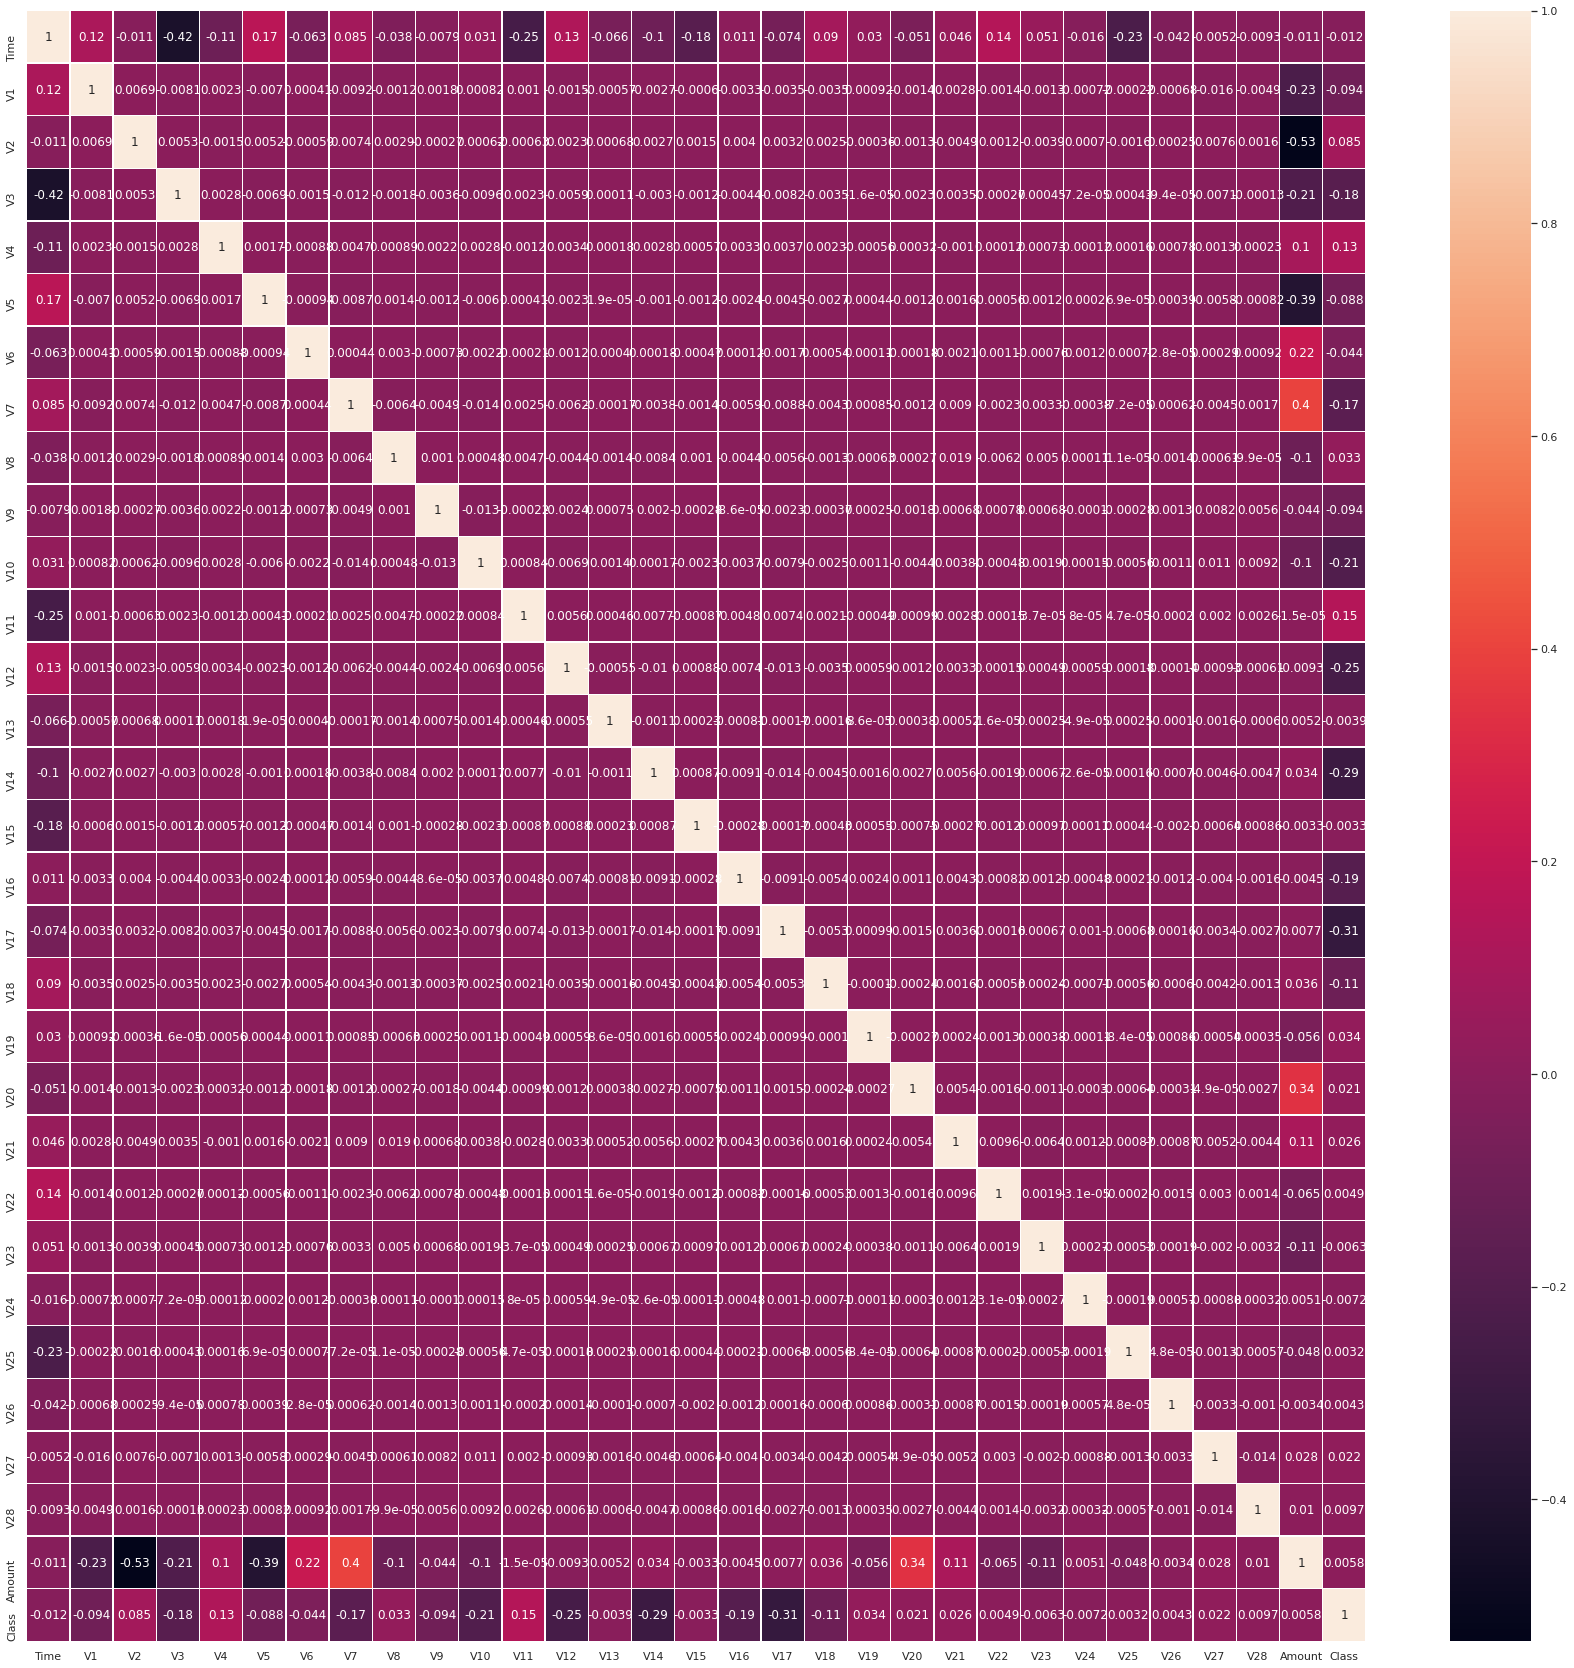

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(30,30)) 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,linewidths=.5,ax=ax)

In [ ]:
#Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
features = df.iloc[:,0:29].columns
plt.figure(figsize=(15,29*4))
gs = gridspec.GridSpec(29, 1)
for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[c][df.Class == 1], bins=50,label='Fraud')
    sns.distplot(df[c][df.Class == 0], bins=50,label="Valid")
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [ ]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


Under Sampling 


Model-1 Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Number of Fraudulent Transactions --> 473

In [ ]:
legit_sample = legit.sample(n=473)

In [ ]:
#Concatenating two DataFrames

In [ ]:
new_df = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
221019,142394.0,2.097071,-0.222751,-1.551993,0.335213,-0.085545,-1.278216,0.170510,-0.337032,0.747998,0.176848,-1.280377,-0.604498,-1.456802,0.599506,0.116888,-0.258126,-0.190239,-0.111805,-0.025847,-0.307855,0.306550,1.059282,-0.108798,-0.030527,0.312759,1.021005,-0.104481,-0.083791,5.44,0
116532,74319.0,1.344846,-0.418145,0.204762,-0.653515,-0.965454,-1.090996,-0.253617,-0.145540,-1.246309,0.868438,1.336925,0.210425,-0.781420,0.676390,0.090520,-1.204909,-0.065865,0.882347,-0.263876,-0.529951,-0.749367,-1.837375,0.311310,0.473401,-0.102422,0.596985,-0.085735,-0.001009,11.98,0
41861,40861.0,-1.920590,1.032618,0.925717,3.103800,-2.896556,2.114305,1.412422,-3.314521,-1.569438,0.013235,-0.370633,-0.202259,0.302879,0.389624,1.661306,0.728814,-0.044362,-0.018476,0.557454,-0.116369,-1.659468,-0.242264,-2.750024,0.581667,-0.835471,0.002737,0.640418,-0.110594,912.79,0
128168,78623.0,1.194441,0.276620,0.640753,0.639140,-0.371167,-0.687862,0.053699,-0.140182,-0.120210,-0.137384,0.454242,1.050936,1.156884,0.104426,1.159106,-0.127997,-0.078386,-1.210525,-0.606674,-0.076359,-0.197662,-0.494719,0.195180,0.420133,0.132055,0.100943,-0.006174,0.020926,1.98,0
243606,151998.0,2.224777,-0.635831,-1.459469,-1.110099,-0.220857,-0.817196,-0.334532,-0.329283,-0.951380,1.014594,0.866000,0.587976,1.469734,-0.056613,-0.480334,1.155210,-0.347522,-0.810384,0.884572,0.065460,0.465491,1.405231,-0.096356,-0.396402,0.281966,0.074806,-0.034378,-0.078531,10.00,0


In [ ]:
new_df['Class'].value_counts()

1    473
0    473
Name: Class, dtype: int64

In [ ]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,95255.029598,0.072155,-0.029126,0.054333,0.012865,-0.011238,0.105347,-0.018227,-0.063404,-0.028010,0.030453,0.015318,0.097626,0.019492,-0.005208,0.01976,0.030349,-0.044618,-0.004824,0.004440,-0.007363,0.021488,-0.044071,0.007222,0.020266,-0.015481,-0.005996,-0.003285,-0.022318,89.002452
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.07283,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


Splitting the data into Features & Targets

In [ ]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [ ]:
print(X)

            Time        V1        V2  ...       V27       V28  Amount
221019  142394.0  2.097071 -0.222751  ... -0.104481 -0.083791    5.44
116532   74319.0  1.344846 -0.418145  ... -0.085735 -0.001009   11.98
41861    40861.0 -1.920590  1.032618  ...  0.640418 -0.110594  912.79
128168   78623.0  1.194441  0.276620  ... -0.006174  0.020926    1.98
243606  151998.0  2.224777 -0.635831  ... -0.034378 -0.078531   10.00
...          ...       ...       ...  ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653  ...  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381  ...  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366  ...  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864  ...  0.884876 -0.253700  245.00
281674  170348.0  1.991976  0.158476  ...  0.002988 -0.015309   42.53

[946 rows x 30 columns]


In [ ]:
print(Y)

221019    0
116532    0
41861     0
128168    0
243606    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (756, 30) (190, 30)


Model Training

In [ ]:
model_logistic_regression = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model_logistic_regression.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Model Evaluation
#Accuracy Score
# accuracy on training data
X_train_prediction = model_logistic_regression.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

In [ ]:
# accuracy on test data
X_test_prediction = model_logistic_regression.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score

In [ ]:
# Create model evaluation functions.
def get_Y_pred(model, X_test):
    return model.predict(X_test)

def get_confusion_matrix(Y_test, Y_predict):
    cf = confusion_matrix(Y_test, Y_predict)
    return cf



def get_metrics(cf):
    print("True positive: {}".format(cf[0][0]))
    print("True negative: {}".format(cf[1][1]))
    print("False positive/Type I error: {}".format(cf[1][0]))
    print("False negative/Type II error: {}".format(cf[0][1]))
    print("Sensitivity: {}".format(cf[0][0]/(cf[0][0]+cf[0][1])))
    print("Specificity: {}".format(cf[1][1]/(cf[1][1]+cf[1][0])))
    print("Precision: {}".format(cf[0][0]/(cf[0][0]+cf[1][0])))
    print("Negative predictive value: {}".format(cf[1][1]/(cf[1][1]+cf[0][1])))
    print("False positive rate: {}".format(1 - cf[0][0]/(cf[0][0]+cf[0][1])))
    print("False negative rate: {}".format(1 - cf[1][1]/(cf[1][1]+cf[1][0])))
    print("Accuracy: {}".format((cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[1][0]+cf[0][1])))
    
def get_roc_auc_score(Y_test, Y_model_predict):
    return print("ROC_AUC score: ",roc_auc_score(Y_test, Y_model_predict))

In [ ]:
# Get predicted labels.
Y_pred_logistic_regression = get_Y_pred(model_logistic_regression, X_test)
# Get confusion matrix.
cf_logistic_regression = confusion_matrix(Y_test, Y_pred_logistic_regression)
print(cf_logistic_regression)

In [ ]:
# Show confusion matrix derivations.
get_metrics(cf_logistic_regression)
get_roc_auc_score(Y_test, Y_pred_logistic_regression)

In [ ]:
# Replace 0 and 1 with 'No Fraud' and 'Fraud'.
labels = ['No Fraud', 'Fraud']
# Plot confusion matrix.
plot_confusion_matrix(model_logistic_regression, 
                      X_test, 
                      Y_test, 
                      display_labels=labels, 
                      cmap=plt.cm.Oranges)
plt.title("Confusion matrix: Logistic Regression")
plt.show()

In [ ]:
# Additional Logistic Regression analysis - feature importance via model coefficients.
# Get importance.
importance = abs(model_logistic_regression.coef_).squeeze()
# Get variable names.
features = list(df.columns[:-1])
# Plot feature importance.
fig, ax = plt.subplots()
x_pos = np.arange(len(features))
hbars = ax.bar(x_pos, importance, align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(features)
ax.set_xlabel('Features')
ax.set_title('Feature importance')

plt.xticks(rotation=90)
plt.show()


Model 2 - Random Forest.

In [ ]:
# Import random forest classifier.
from sklearn.ensemble import RandomForestClassifier
# Fit model.
model_random_forest = RandomForestClassifier(max_depth=20)
model_random_forest.fit(X_train, Y_train)

In [ ]:
# Get predicted labels.
Y_pred_random_forest = get_Y_pred(model_random_forest, X_test)
# Get confusion matrix.
cf_random_forest = confusion_matrix(Y_test, Y_pred_random_forest)
print(cf_random_forest)

In [ ]:
# Show confusion matrix derivations.
get_metrics(cf_random_forest)
get_roc_auc_score(Y_test, Y_pred_random_forest)

In [ ]:
# Plot confusion matrix.
plot_confusion_matrix(model_random_forest, 
                      X_test, 
                      Y_test, 
                      display_labels=labels, 
                      cmap=plt.cm.Oranges)
plt.title("Confusion matrix: Random Forest")
plt.show()

Smote

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_for_sm = df.drop(columns='Class', axis=1)
y_for_sm = df['Class']
X_for_sm.shape, y_for_sm.shape

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=4)
X_oversampled , y_oversampled = sm.fit_resample(X_for_sm, y_for_sm)
X_oversampled.shape, y_oversampled.shape


In [ ]:
sns.countplot(y_oversampled)

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_oversampled, y_oversampled, test_size=0.33, random_state=42)
model_lr_smt = LogisticRegression(solver='liblinear')
model_lr_smt.fit(X_train_sm, y_train_sm)

In [ ]:
# we will use downsampling method. 
# i will split the data into smaller parts (=492 rows)
class_0_df = df[df['Class']==0]
class_1_df = df[df['Class']==1]

class_1_df.shape


In [ ]:
#Now i will take the class_0_df and split it randomly in small parts each equal to 492 rows
# we first shuffle it
class_0_df = class_0_df.sample(frac = 1, random_state = 42)
class_0_df_subsample = class_0_df.loc[:][:492]

class_0_df_subsample.shape

In [ ]:
final_df = pd.concat([class_0_df_subsample,class_1_df])
final_df = final_df.sample(frac = 1, random_state = 42)

In [ ]:
X = final_df.drop(columns=['Class'])
Y = final_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
model_lr = LogisticRegression(max_iter=120,random_state=0, n_jobs=20, solver='liblinear')
model_lr.fit(X_train, y_train)

In [ ]:
trn_lr_smt_pred = model_lr.predict(X_train_sm)
trn_lr_smt_acc = accuracy_score(trn_lr_smt_pred, y_train_sm)
print(round(trn_lr_smt_acc*100, 2))

In [ ]:
tst_lr_smt_pred = model_lr.predict(X_test_sm)
tst_lr_smt_acc = accuracy_score(tst_lr_smt_pred, y_test_sm)
print(round(tst_lr_smt_acc*100, 2))